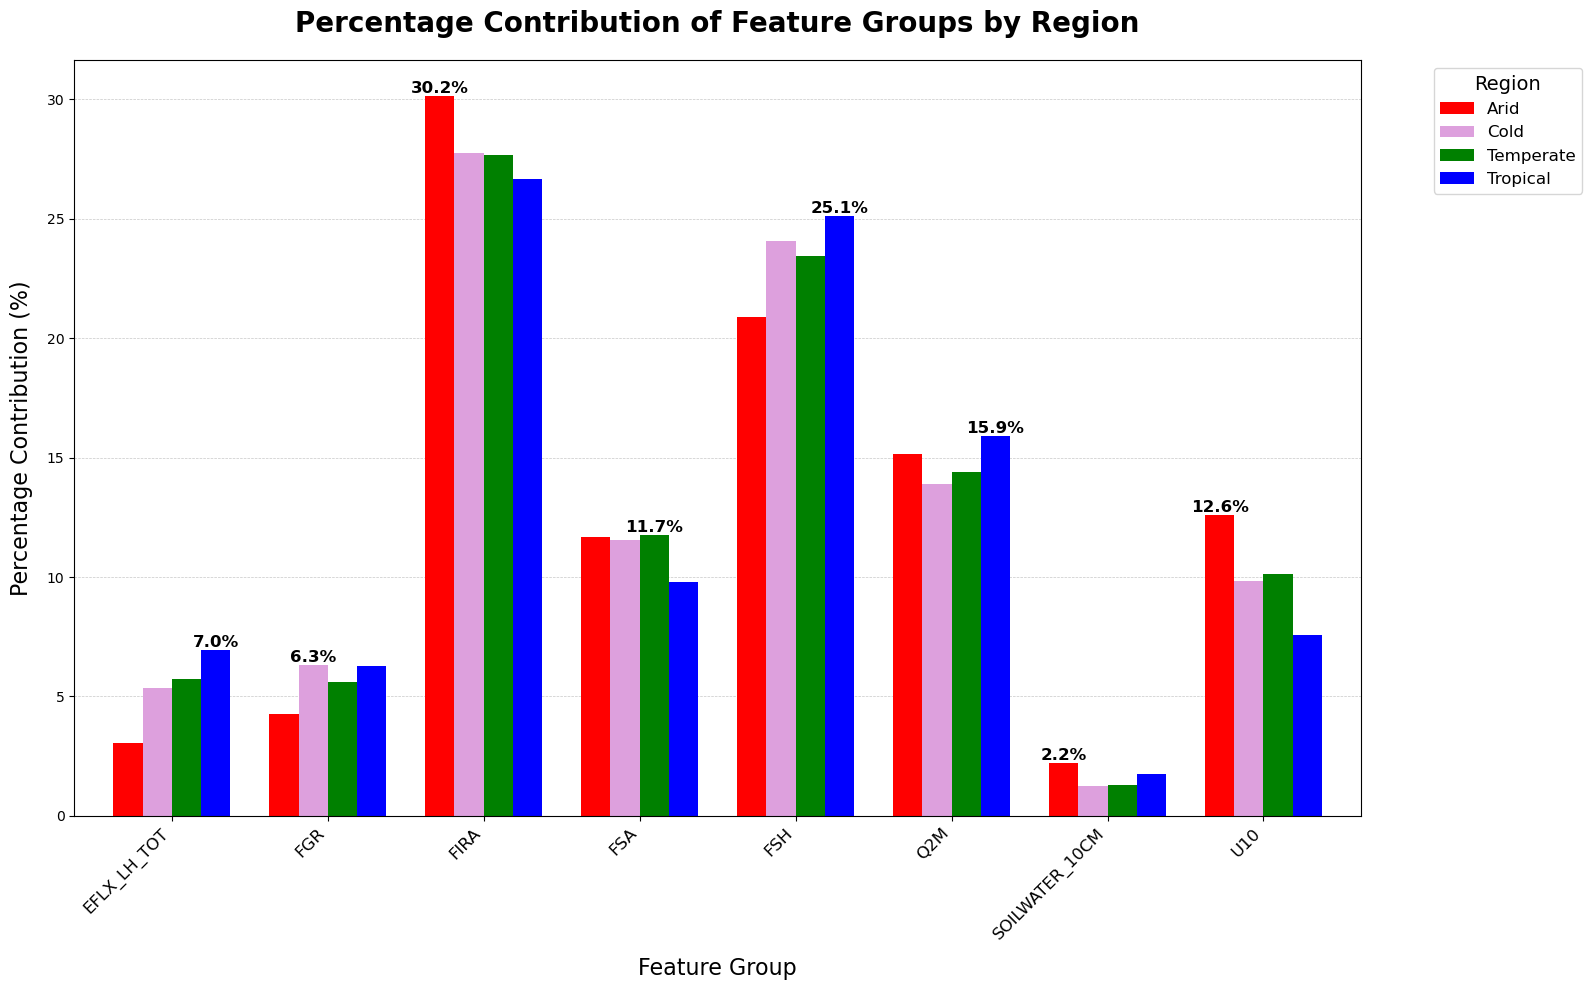

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory containing the CSV files
base_directory = "/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.05/research_results/summary/mlflow/mlartifacts/688208898444255196/23ec2bcc719a4a4bb6bd569edd5790b7/artifacts/KGMajor/"
climate_zones = ["Arid", "Cold", "Temperate", "Tropical"]

# Define Köppen-Geiger zone colors based on the provided table
# major_zone_colors = {
#     "Tropical": "#0000FF",    # Blue tones for Tropical climates
#     "Arid": "#FF0000",        # Red-Orange tones for Arid climates
#     "Temperate": "#008000",   # Green tones for Temperate climates
#     "Cold": "#800080",        # Purple tones for Continental (Cold) climates
#     "Polar": "#B0B0B0",       # Gray tones for Polar climates
# }
# major_zone_colors = {
#     "Tropical": "#87CEFA",    # Light blue tones for Tropical climates
#     "Arid": "#FF7F7F",        # Light red tones for Arid climates
#     "Temperate": "#90EE90",   # Light green tones for Temperate climates
#     "Cold": "#DDA0DD",        # Light purple tones for Continental (Cold) climates
#     "Polar": "#D3D3D3",       # Light gray tones for Polar climates
# }

major_zone_colors = {
    "Tropical": "#0000FF",    # blue tones for Tropical climates
    "Arid": "#FF0000",        # red tones for Arid climates
    "Temperate": "#008000",   # green tones for Temperate climates
    "Cold": "#DDA0DD",        # Light purple tones for Continental (Cold) climates
    "Polar": "#D3D3D3",       # Light gray tones for Polar climates
}

# Initialize an empty DataFrame to consolidate data
consolidated_data = pd.DataFrame()

# Read each CSV file and append it to the consolidated DataFrame
for zone in climate_zones:
    file_path = os.path.join(base_directory, zone, f"{zone}_day_shap_feature_importance_by_group.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df['Region'] = zone
        consolidated_data = pd.concat([consolidated_data, df], ignore_index=True)

# Pivot the data for grouped bar chart
data_pivot = consolidated_data.pivot(index='Feature Group', columns='Region', values='Percentage')

# Use consistent colors for the bar chart
colors = [major_zone_colors[zone] for zone in data_pivot.columns]

# Plot the grouped bar chart
ax = data_pivot.plot(kind='bar', figsize=(16, 10), width=0.75, color=colors)

# Add gridlines for better readability
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)

# Set plot title and labels
ax.set_title('Percentage Contribution of Feature Groups by Region', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Feature Group', fontsize=16, labelpad=10)
ax.set_ylabel('Percentage Contribution (%)', fontsize=16, labelpad=10)

# Customize x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust legend to align with the defined regions and colors
ax.legend(
    title='Region',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12,
    title_fontsize=14,
    labels=data_pivot.columns,
)

# Add labels only to the bars with the highest value for each feature group
for i, feature_group in enumerate(data_pivot.index):
    # Get the maximum value and its corresponding region
    max_value = data_pivot.loc[feature_group].max()
    max_region = data_pivot.columns[data_pivot.loc[feature_group] == max_value][0]
    
    # Find the index of the max_region and add label to its corresponding bar
    region_index = data_pivot.columns.get_loc(max_region)
    bar_container = ax.containers[region_index]
    
    # Label only the bar with the highest percentage
    ax.bar_label(
        bar_container,
        labels=[f'{max_value:.1f}%' if j == i else '' for j in range(len(data_pivot))],
        label_type='edge',
        fontsize=12,
        fontweight='bold',
    )

# Improve layout to avoid overlapping elements
plt.tight_layout()

# Display the plot
plt.show()


# Factor contribution by hour

In [1]:
#load data from feather file /Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.05/research_results/summary/mlflow/Hourly_kg_model_Hourly_HW98_no_filter/shap_values_with_additional_columns.feather

